In [2]:
# Import all the things we need ---
#   by setting env variables before Keras import you can set up which backend and which GPU it uses
import os,random
import keras
#os.environ["KERAS_BACKEND"] = "theano"

os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ["CUDA_VISIBLE_DEVICE"]  = '0'
#os.environ["THEANO_FLAGS"]  = "floatX=float32"
#os.environ["THEANO_FLAGS"]  = "device=cuda%d"%(1)

In [3]:
import numpy as np
import seaborn as sns
import pickle, random, sys

In [4]:
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
#from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam
#import theano as th
#import theano.tensor as T
import os
WEIGHTS_PATH = ('resnet_like_weights_tf_dim_ordering_tf_kernels.h5')
from keras.models import Model
from keras.layers import Input,Dense,Conv1D,MaxPool1D,ReLU,Dropout,Softmax
from keras.layers import LSTM
import keras
from keras.callbacks import LearningRateScheduler
import keras.backend as K
from keras.callbacks import LearningRateScheduler
from keras.regularizers import *
from tensorflow.keras.optimizers import Adam
from keras.models import model_from_json
import tensorflow as tf

In [5]:
import importlib,sys

importlib.reload(sys)

<module 'sys' (built-in)>

In [6]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

In [7]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
cd C:\\Users\\Serendipity\\AMC_Feature_Representation

C:\Users\Serendipity\AMC_Feature_Representation


In [9]:
pwd

'C:\\Users\\Serendipity\\AMC_Feature_Representation'

In [10]:
# Load the dataset ...
#  You will need to seperately download or generate this file
dbfile = open('RML2016.10a_dict.dat', 'rb')      
Xd = pickle.load(dbfile,encoding='latin1') 

In [11]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [12]:
# Partition the data
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
np.random.seed(2016)
n_examples = X.shape[0]
n_train = int(n_examples * 0.9)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

In [13]:
print('数据集总数：',n_examples)
print('调制方式' , len(mods),'种:' ,mods)
print('信噪比:',snrs)

数据集总数： 220000
调制方式 11 种: ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
信噪比: [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [14]:
X_train=X_train.swapaxes(2,1)
X_test = X_test.swapaxes(2,1)
X_train.shape,X_test.shape

((198000, 128, 2), (22000, 128, 2))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.111, random_state=42)
print("X_train,", X_train.shape)
print("X_val,", X_val.shape)
print("Y_train,", Y_train.shape)
print("Y_val,", Y_val.shape)

X_train, (176022, 128, 2)
X_val, (21978, 128, 2)
Y_train, (176022, 11)
Y_val, (21978, 11)


In [16]:
tf.config.experimental_run_functions_eagerly(True)

In [26]:
pwd

'C:\\Users\\Serendipity'

In [25]:
cd ..

C:\Users\Serendipity


# Attack XGBOOST

In [18]:
import joblib
model = joblib.load('model_saved\Feat_based\XGB_FEAT_35.pkl')

In [26]:
from art.attacks.evasion import ZooAttack

In [38]:
import xgboost as xgb
import numpy as np

from art.attacks.evasion import ZooAttack
from art.estimators.classification import XGBoostClassifier
from art.utils import load_mnist

from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import SklearnClassifier

In [41]:
classifier = SklearnClassifier(
    model=model
)

D:\Anaconda3\envs\AMC\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
attack = FastGradientMethod(estimator=model, eps=0.2)

EstimatorError: FastGradientMethod requires an estimator derived from <class 'art.estimators.estimator.BaseEstimator'> and <class 'art.estimators.estimator.LossGradientsMixin'>, the provided classifier is an instance of <class 'sklearn.multiclass.OneVsRestClassifier'> and is derived from (<class 'sklearn.base.MultiOutputMixin'>, <class 'sklearn.base.ClassifierMixin'>, <class 'sklearn.base.MetaEstimatorMixin'>, <class 'sklearn.base.BaseEstimator'>).

In [22]:
def plot_confusion_matrix(cm, title='IQ-based Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda3\envs\AMC\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-95eb9d538304>", line 13, in <module>
    plt.savefig('/home/ise/zhaixu/AMC_Represetation/Sequence_based/pic/CM/IQ_CM_CLDNN.jpg',dpi = 300)
  File "C:\Users\Serendipity\AppData\Roaming\Python\Python37\site-packages\matplotlib\pyplot.py", line 859, in savefig
    res = fig.savefig(*args, **kwargs)
  File "C:\Users\Serendipity\AppData\Roaming\Python\Python37\site-packages\matplotlib\figure.py", line 2311, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "C:\Users\Serendipity\AppData\Roaming\Python\Python37\site-packages\matplotlib\backend_bases.py", line 2217, in print_figure
    **kwargs)
  File "C:\Users\Serendipity\AppData\Roaming\Python\Python37\site-packages\matplotlib\backend_bases.py", line 1639, in wrapper
    return func(*args, **kwargs)
  File "C:

FileNotFoundError: [Errno 2] No such file or directory: '/home/ise/zhaixu/AMC_Represetation/Sequence_based/pic/CM/IQ_CM_CLDNN.jpg'

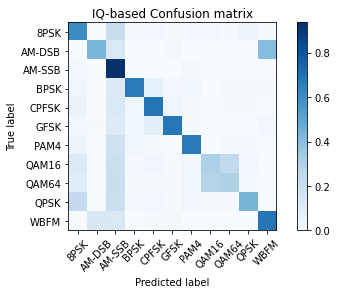

In [23]:
# Plot confusion matrix
classes = mods
test_Y_hat = model.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)
plt.savefig('/home/ise/zhaixu/AMC_Represetation/Sequence_based/pic/CM/IQ_CM_CLDNN.jpg',dpi = 300)
plt.show()

In [34]:
pwd

'/home/ise/zhaixu/AMC_Represetation/Sequence_based'

# Attack DNN

In [20]:
from keras.models import load_model
model = load_model('C:\\Users\\Serendipity\\AMC_Feature_Representation\\model_saved\\Sequence_based\\CLDNN_IQ.h5')

AttributeError: 'NoneType' object has no attribute 'op'

In [17]:
def evaluation(model,X_test,Y_test):
    classes = mods
    acc = {}
    for snr in snrs:
    
        # extract classes @ SNR
        test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
        test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
        test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]   
        
        # estimate classes
        test_Y_i_hat = model.predict(test_X_i)
        conf = np.zeros([len(classes),len(classes)])
        
        for i in range(0,test_X_i.shape[0]):
            j = list(test_Y_i[i,:]).index(1)
            k = int(np.argmax(test_Y_i_hat[i,:]))
            conf[j,k] = conf[j,k] + 1

        cor = np.sum(np.diag(conf))
        ncor = np.sum(conf) - cor
        #print("Overall Accuracy: ", cor / (cor+ncor))
        print(cor / (cor+ncor))
        acc[snr] = 1.0*cor/(cor+ncor)
      
    return acc

0.08620689655172414
0.08880666049953746
0.10054844606946983
0.08239700374531835
0.12214411247803164
0.11559139784946236
0.19414634146341464
0.2126899016979446
0.24233716475095785
0.26660761736049604
0.2199281867145422
0.23486901535682023
0.2538116591928251
0.24237140366172624
0.23895401262398558
0.2448405253283302
0.23721340388007053
0.24628252788104088
0.24223034734917734
0.25668449197860965


In [28]:
# model0:原模型测试
classes = mods
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]   
    #print(test_X_i)
    test_Y_i_hat = model.predict(test_X_i)
    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    #plt.figure()
    #plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    #print("Overall Accuracy: ", cor / (cor+ncor))
    print(cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

0.12431941923774954
0.14246068455134134
0.180073126142596
0.20037453183520598
0.273286467486819
0.2885304659498208
0.33463414634146343
0.46648793565683644
0.5823754789272031
0.7227635075287865
0.7809694793536804
0.8102981029810298
0.8242152466367713
0.8221447253705318
0.8539224526600541
0.8236397748592871
0.8350970017636684
0.8633828996282528
0.8464351005484461
0.8324420677361853


In [29]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
tf.config.experimental_run_functions_eagerly(True)

In [38]:
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from art.utils import load_mnist

classifier = KerasClassifier(model=model)
attack_fgsm = FastGradientMethod(estimator=classifier, eps=0.2)
x_test_adv = attack_fgsm.generate(X_test)

RuntimeError: Attempted to aggregate unsupported object Tensor("model_1/softmax/Softmax:0", shape=(32, 11), dtype=float32).